In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tushare as ts
import numpy as np
import matplotlib.pyplot as plt

In [2]:

#启用接口
pro=ts.pro_api('c07f4701cbb05cf7a9d93485be15cc93796552a2eb9dfbfa82a09b67')

# 定义参数
start_date = '20200101'
end_date = '20230101'

# 定义ts_code列表
ts_code_list = ['601318.SH', '600036.SH', '000651.SZ', '002594.SZ', '601888.SH']
df_close = pd.DataFrame()
# 遍历ts_code列表，获取每个股票的日线行情数据，并将其保存为CSV文件
for ts_code in ts_code_list:
    df = pro.daily(ts_code=ts_code, adj='qfq', start_date=start_date, end_date=end_date)
    #file_name = ts_code + '.csv'
    df_close=pd.concat([df_close,df['close']],axis=1)
    #df.to_csv(file_name, index=False)

In [3]:
merged_df=df_close

In [4]:
merged_df.columns = ['600036.SH', '601318.SH', '000651.SZ', '002594.SZ', '601888.SH']
merged_df.head(5)

,600036.SH,601318.SH,000651.SZ,002594.SZ,601888.SH
0,47.00,37.26,32.32,256.97,216.03
1,45.82,37.23,32.16,254.76,216.15
2,46.28,37.33,32.57,254.62,218.80
3,45.58,36.67,32.63,262.12,218.21
4,44.66,35.95,32.35,262.42,218.15


In [5]:
merged_df = merged_df.apply(lambda x: np.log(x/x.shift(1)))

In [6]:
merged_df


,600036.SH,601318.SH,000651.SZ,002594.SZ,601888.SH
0,NaN,NaN,NaN,NaN,NaN
1,-0.025427,-0.000805,-0.004963,-0.008637,0.000555
2,0.009989,0.002682,0.012668,-0.000550,0.012185
3,-0.015241,-0.017838,0.001840,0.029030,-0.002700
4,-0.020391,-0.019830,-0.008618,0.001144,-0.000275
...,...,...,...,...,...
723,-0.000470,-0.012676,-0.015576,-0.007795,-0.029144
724,0.013439,0.019083,-0.021746,0.016155,-0.004281
725,-0.006405,0.002296,-0.021622,0.004775,-0.010060
726,0.006985,0.004069,0.018349,-0.004983,0.010830


In [7]:
merged_df.dropna(inplace=True)


In [8]:
merged_df.columns = ['600036.SH', '601318.SH', '000651.SZ', '002594.SZ', '601888.SH']
merged_df

,600036.SH,601318.SH,000651.SZ,002594.SZ,601888.SH
1,-0.025427,-0.000805,-0.004963,-0.008637,0.000555
2,0.009989,0.002682,0.012668,-0.000550,0.012185
3,-0.015241,-0.017838,0.001840,0.029030,-0.002700
4,-0.020391,-0.019830,-0.008618,0.001144,-0.000275
5,0.021706,0.011615,0.013205,-0.039803,0.023468
...,...,...,...,...,...
723,-0.000470,-0.012676,-0.015576,-0.007795,-0.029144
724,0.013439,0.019083,-0.021746,0.016155,-0.004281
725,-0.006405,0.002296,-0.021622,0.004775,-0.010060
726,0.006985,0.004069,0.018349,-0.004983,0.010830


In [9]:
excess = merged_df.sub(merged_df.mean())

In [10]:
mean_vector = np.array(merged_df.mean(numeric_only=True))
mean_vector

array([ 8.33004224e-04,  5.85414229e-05,  1.02111389e-03, -2.30292012e-03,
       -1.20364816e-03])

In [11]:
cov_matrix = excess.cov(numeric_only=True).astype(float)
cov_matrix

,600036.SH,601318.SH,000651.SZ,002594.SZ,601888.SH
600036.SH,0.000311,0.000271,0.000177,0.000100,0.000184
601318.SH,0.000271,0.000444,0.000167,0.000112,0.000244
000651.SZ,0.000177,0.000167,0.000331,0.000125,0.000232
002594.SZ,0.000100,0.000112,0.000125,0.001118,0.000366
601888.SH,0.000184,0.000244,0.000232,0.000366,0.001091


In [54]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

def portfolio_optimization(mu, Sigma, tau):
    n = len(mu)
    w = np.ones(n) / n

    def objective(w):
        return 0.5 * w.T @ Sigma @ w

    def constraint1(w):
        return w.T @ mu - tau

    def constraint2(w):
        return w.T @ np.ones(n) - 1

    cons = (
        {'type': 'ineq', 'fun': constraint1},
        {'type': 'eq', 'fun': constraint2}
    )
    result = minimize(objective, w,constraints=cons)
    return result.x

def plot_efficient_frontier(mu, Sigma, num_points=100):
    min_return = 0
    max_return = np.max(mu)
    target_returns = np.linspace(min_return, max_return, num_points)

    efficient_frontier_x = []
    efficient_frontier_y = []

    for tau in target_returns:
        w_opt = portfolio_optimization(mu, Sigma, tau)
        #print(w_opt)
        portfolio_return = w_opt.T @ mu
        portfolio_risk = np.sqrt(w_opt.T @ Sigma @ w_opt)

        efficient_frontier_x.append(portfolio_risk)
        efficient_frontier_y.append(portfolio_return)

    plt.scatter(efficient_frontier_x, efficient_frontier_y)
    plt.xlabel("Portfolio Risk")
    plt.ylabel("Portfolio Return")
    plt.title("Efficient Frontier")
    plt.show()

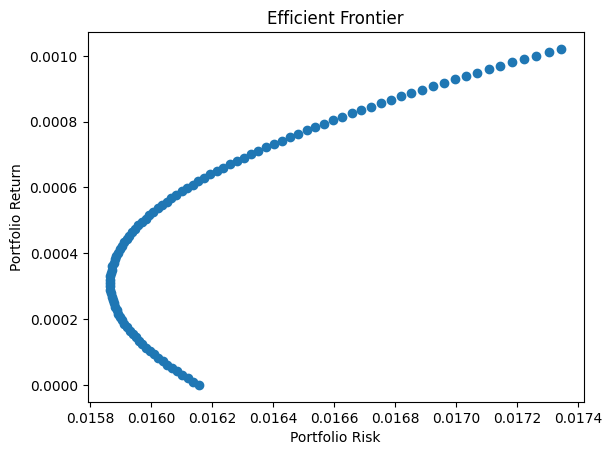

In [55]:
plot_efficient_frontier(mean_vector, cov_matrix, 100)

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.stats import norm

def calculate_CVaR(w, scenarios, alpha=0.95):
    portfolio_returns = scenarios @ w
    VaR = np.percentile(portfolio_returns, (1 - alpha) * 100)
    CVaR = np.mean(portfolio_returns[portfolio_returns < VaR])
    return CVaR

def mean_CVaR_optimization(mu, scenarios, tau):
    n = len(mu)
    w = np.ones(n) / n

    def objective(w):
        return calculate_CVaR(w, scenarios)

    def constraint1(w):
        return w.T @ mu - tau

    def constraint2(w):
        return w.T @ np.ones(n) - 1

    cons = (
        {'type': 'ineq', 'fun': constraint1},
        {'type': 'eq', 'fun': constraint2}
    )

    result = minimize(objective, w, constraints=cons)
    return result.x


def plot_mean_CVaR_efficient_frontier(mu, cov_matrix, scenarios, num_points=100):
    min_return = 0
    max_return = np.max(mu)
    target_returns = np.linspace(min_return, max_return, num_points)

    efficient_frontier_x = []
    efficient_frontier_y = []

    for tau in target_returns:
        w_opt = mean_CVaR_optimization(mu, scenarios, tau)
        print(w_opt)
        portfolio_return = w_opt.T @ mu
        portfolio_std_dev = np.sqrt(w_opt.T @ cov_matrix @ w_opt) # Calculate portfolio standard deviation

        efficient_frontier_x.append(portfolio_std_dev)
        efficient_frontier_y.append(portfolio_return)

    plt.scatter(efficient_frontier_x, efficient_frontier_y)
    plt.xlabel("Portfolio Standard Deviation")
    plt.ylabel("Portfolio Return")
    plt.title("Mean-CVaR Efficient Frontier")
    plt.show()


def generate_bootstrap_scenarios(historical_returns, num_scenarios):
    num_samples, num_assets = historical_returns.shape
    bootstrap_scenarios = np.zeros((num_scenarios, num_assets))

    for i in range(num_scenarios):
        random_indices = np.random.randint(0, num_samples, num_samples)
        bootstrap_scenario = historical_returns[random_indices].mean(axis=0)
        bootstrap_scenarios[i] = bootstrap_scenario
    return bootstrap_scenarios

[0.24590987 0.21504307 0.25348569 0.12058455 0.16497683]
[0.2473978  0.21553051 0.25521664 0.11802133 0.16383371]
[0.24888574 0.21601796 0.25694759 0.11545812 0.1626906 ]
[0.25037368 0.21650541 0.25867853 0.1128949  0.16154748]
[0.25186162 0.21699285 0.26040948 0.11033169 0.16040436]
[0.25334956 0.2174803  0.26214043 0.10776847 0.15926124]
[0.2548375  0.21796774 0.26387138 0.10520526 0.15811813]
[0.25632543 0.21845519 0.26560233 0.10264204 0.15697501]
[0.25781337 0.21894264 0.26733328 0.10007883 0.15583189]
[0.25930131 0.21943008 0.26906422 0.09751561 0.15468877]
[0.26078925 0.21991753 0.27079517 0.09495239 0.15354566]
[0.26227719 0.22040497 0.27252612 0.09238918 0.15240254]
[0.26376513 0.22089242 0.27425707 0.08982596 0.15125942]
[0.26525306 0.22137987 0.27598802 0.08726275 0.1501163 ]
[0.266741   0.22186731 0.27771897 0.08469953 0.14897319]
[0.26822894 0.22235476 0.27944991 0.08213632 0.14783007]
[0.26971688 0.22284221 0.28118086 0.0795731  0.14668695]
[0.27120482 0.22332965 0.282911

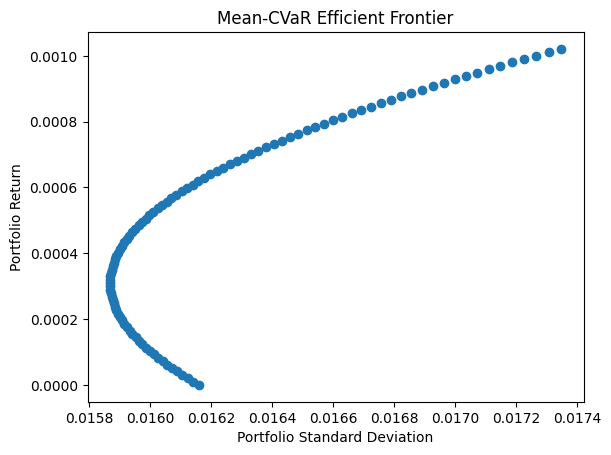

In [45]:
bs_scenarios=generate_bootstrap_scenarios(np.array(merged_df), 5000)
scenarios=np.array(merged_df)
plot_mean_CVaR_efficient_frontier(mean_vector,cov_matrix, bs_scenarios,100)

In [39]:
print('portfolio mean:\n',merged_df.mean())
print('portfolio variance:\n',merged_df.var())
print('portfolio skewness:\n',merged_df.skew())
print('portfolio kurtosis:\n',merged_df.kurt())

portfolio mean:
 600036.SH    0.000833
601318.SH    0.000059
000651.SZ    0.001021
002594.SZ   -0.002303
601888.SH   -0.001204
dtype: float64
portfolio variance:
 600036.SH    0.000311
601318.SH    0.000444
000651.SZ    0.000331
002594.SZ    0.001118
601888.SH    0.001091
dtype: float64
portfolio skewness:
 600036.SH   -0.502015
601318.SH   -0.220908
000651.SZ   -0.184236
002594.SZ   -0.196523
601888.SH   -0.039129
dtype: float64
portfolio kurtosis:
 600036.SH    2.187362
601318.SH    2.105945
000651.SZ    2.054747
002594.SZ    0.873005
601888.SH    0.884969
dtype: float64
